# Avaliação

<img src="images/python-logo.jpg" alt="Python" style="width: 300px;"/>

A avaliação deste módulo irá pôr-vos no lugar de um Data Scientist que está a trabalhar numa app para fazer recomendações de vinhos. A vossa chefia pediu-vos para analisarem um *dataset* de reviews de vinhos (que podem encontrar no ficheiro `data/wine-reviews/wine_reviews`), e responderem às seguintes questões:

1. qual foi a review (*description*) que o provador de vinhos Roger Voss deu ao champagne com o título (*title*) Delamotte NV Rosé Brut Champagne? 
2. quais são as 5 variedades (*variety*) de vinho mais comuns?
3. a provadora Virginie Boone foi mais activa para vinhos de que região (*region_1*)?
4. qual foi a classificação média entre todos os vinhos? E só para vinhos da California (*province*)?
5. qual a distribuição dos preços de vinhos franceses?
6. qual o melhor país para alguém apreciador de vinhos da variedade "Red Blend"?
7. que combinação province/region_1 contém mais vinhos com pontuação superior a 80?
8. quais são os títulos dos vinhos com a pontuação mais baixa?

As respostas a estas questões podem vir acompanhadas de visualizações, quando adequado.

Para além destas perguntas, a vossa chefia pediu-vos para criarem algumas funções:

9. uma função que recebe o nome de um provador (*taster_name*) e um país, e calcula o número de reviews, pontuação mínima/média/máxima, e preço médio dos vinhos que ele provou desse país. O resultado deve aparecer num string formatado (exemplo: "O provador X provou N vinhos do país Y ...")
10. uma função que recebe o nome de um provador, e cria uma análise da palavras mais frequentes utilizadas por esse provador nas suas reviews, para avaliar o quão positivo/negativo ele é (dica: será que palavras como "the", "a", "this"... importam nesta análise?). O output da função deverá estar ordenado em ordem decrescente, deixando ao vosso critério que estruturas de dados utilizar.

Gostariam também de ter as seguintes colunas nos dados:

11. uma coluna com o preço do vinho + IVA (23%);
12. uma coluna com o nome do provador + o twitter handle (exemplo: Roger Voss@vossroger). Nos casos em que um ou mais não seja conhecido, devem ser substituídos por "unknown" (exemplo: no caso de um reviewer anónimo, unknown@unknown).

A vossa chefia disse-vos também que qualquer análise adicional seria bem vinda, e que estão à vontade para serem criativos. 

Têm também aprovação para modificar qualquer um dos requisitos (questões ou funções) se acharem que não está claro, ou que há uma alternativa melhor (uma maneira mais informativa de responder a questão em termos de negócio, por exemplo).

### Notas

O produto final deve ser um Jupyter Notebook enviar por email ao instrutor (por favor incluam num .zip o ficheiro com os dados, e na leitura dos dados usem localizações relativas ao Notebook, para o instrutor poder correr o Notebook no seu próprio computador).

Nesta avaliação importa mais que sejam criativos e escrevam bem o código do que as respostas em si. As únicas maneiras de perder pontos são por falta de esforço, ou falta de clareza na comunicação dos resultados!

Por isso é importante que não se esqueçam de comentar bem o código, e que o escrevam de forma organizada (usando funções, por exemplo). Identifiquem também a qual das perguntas estão a responder. Células em Markdown (texto formatado, como esta que estão a ler) não são obrigatórias.

Bom trabalho e espero que desfrutem de fazer esta análise!

# Soluções

Estas soluções são apenas uma sugestão de resolução, havendo muito outras maneiras de chegar aos mesmos resultados.

### 1

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/wine-reviews/wine_reviews.csv')

In [7]:
review = df.loc[
    (df.taster_name == 'Roger Voss') &
    (df.title == 'Delamotte NV Rosé Brut Champagne'), 
    'description'
].values[0]

print(review)

This is one of the most delicious rosé Champagnes around, a gorgeous vibrant red currant- and pink grapefruit-dominated wine. It's ripe, but so well balanced, its acidity merging into a fine creaminess. It is a wine that is lively, vivid, but remaining dry.


### 2

In [11]:
top5_variety = df.variety.value_counts()[:5]

top5_variety

Pinot Noir                  6587
Chardonnay                  5927
Cabernet Sauvignon          4703
Red Blend                   4484
Bordeaux-style Red Blend    3503
Name: variety, dtype: int64

### 3

In [25]:
df_virginia = df[df.taster_name == 'Virginie Boone']

top_region = df_virginia.region_1.value_counts().index[0]

top_region

'Napa Valley'

### 4

In [27]:
media = df.points.mean()

media_california = df.loc[(df.province == 'California'), 'points'].mean()

print(f'Média: {media};\nMédia (Califórnia): {media_california}')

Média: 88.42849229064721;
Média (Califórnia): 88.57531000275559


### 5

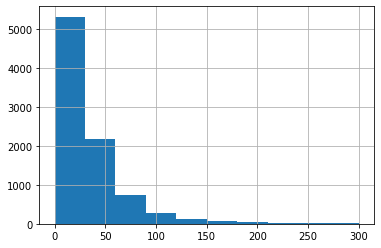

In [35]:
df_franca = df[(df.country == 'France')]

df_franca.price.hist(range=(0, 300))

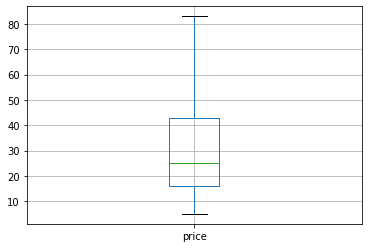

In [37]:
df_franca.boxplot('price', showfliers=False)

### 6

In [44]:
df_red_blend = df[df.variety == 'Red Blend']

df_red_blend_agg = df_red_blend.groupby('country').agg({
    'points': ['mean', 'count']
})

# Não excluindo paises com poucas reviews, a resposta seria Canada
df_red_blend_agg.sort_values(('points', 'mean'), ascending=False).iloc[0]  

points  mean     91.333333
        count     3.000000
Name: Canada, dtype: float64

In [49]:
# No entanto, diria que a Áustria seria o melhor país em geral
df_red_blend_agg.loc[
    df_red_blend_agg[('points', 'count')] >= 30
].sort_values(
    ('points', 'mean'), ascending=False
).iloc[0]  

points  mean     89.770833
        count    48.000000
Name: Austria, dtype: float64

### 7

In [61]:
df_sup_80 = df[df.points > 80]

regiao_provincia = df_sup_80.groupby(
    ['province', 'region_1']
).agg(
    {'points': 'count'}
)

regiao_provincia.sort_values(
    'points', ascending=False
).index[0]

('California', 'Napa Valley')

### 8

In [65]:
df_pontuacoes = df.groupby('title').mean().price

df_pontuacoes.sort_values()[:5]

title
Bandit NV Merlot California                                         4.0
Felix Solis 2013 Flirty Bird Syrah Vino de la Tierra de Castilla    4.0
Dancing Coyote 2015 White Clarksburg                                4.0
Terrenal 2010 Cabernet Sauvignon Yecla                              4.0
Broke Ass 2009 Red Malbec Syrah Mendoza                             4.0
Name: price, dtype: float64

In [68]:
# alternativamente:

preco_minimo = df.price.min()

df[(df.price == preco_minimo)].title.unique()

array(['Terrenal 2010 Cabernet Sauvignon Yecla',
       'Broke Ass 2009 Red Malbec Syrah Mendoza',
       'Terrenal 2010 Estate Bottled Tempranillo Yecla',
       'Bandit NV Merlot California',
       'Dancing Coyote 2015 White Clarksburg',
       'Felix Solis 2013 Flirty Bird Syrah Vino de la Tierra de Castilla'],
      dtype=object)

### 9

In [83]:
def analise_provador(df, nome, pais):
    df_provador = df[
        (df.taster_name == nome) &
        (df.country == pais)
    ]
    
    if df_provador.shape[0] == 0:
        return "Sem dados!"
    
    n_reviews = df_provador.shape[0]
    pontuacao_minima = df_provador.points.min()
    pontuacao_maxima = df_provador.points.max()
    pontuacao_media = df_provador.points.mean()
    preco_medio = df_provador.price.mean()
    
    return f"""
        O/a provador/a {nome} fez {n_reviews} reviews para vinhos de {pais}.
        A pontuação mínima foi {round(pontuacao_minima, 1)}, a média foi {round(pontuacao_media, 1)}, e a máxima foi
        {round(pontuacao_maxima, 1)}. O preço médio dos vinhos foi {round(preco_medio, 1)}€
    """

In [84]:
print(analise_provador(df, 'Roger Voss', 'France'))


        O/a provador/a Roger Voss fez 9334 reviews para vinhos de France.
        A pontuação mínima foi 80, a média foi 88.8, e a máxima foi
        100. O preço médio dos vinhos foi 44.2€
    


### 10

In [134]:
# ... aqui podiam fazer uma lista enorme
PALAVRAS_P_EXCLUIR = ['its', 'and', 'the', 'a', 'is', 'this', 'in', 'or', 'of', 'with', 'it', 'to', 'wine', 'from', 'has', 'that', 'as']  

def analise_vocabulario(df, nome, palavras_p_excluir=PALAVRAS_P_EXCLUIR):
    df_provador = df[df.taster_name == nome].copy()
    
    # converter as reviews em lowercase (exemplo: Vinho == vinho para efeito da nossa análise)
    # e dividindo por palavras
    df_provador['reviews'] = df_provador['description'].str.lower()
    
    # dividindo as reviews em palavras:
    df_provador['reviews_split'] = df_provador['reviews'].str.split()  
    
    # podemos iterar ao longo das reviews:
    dict_contagem = {}
    
    for review in df_provador.reviews_split:
        for word in review:
            # se a palavra for para ignorar, continua:
            if word in palavras_p_excluir:
                continue
                
            # se a palavra não existir no nosso "contador", damos-lhe o valor zero
            if word not in dict_contagem:
                dict_contagem[word] = 0
            #caso contrário, incrementamos a contagem por 1:
            else:
                dict_contagem[word] += 1
      
    # Agora falta ordenar; podiamos por exemplo criar uma Series com os resultados:
    df_resultados = pd.Series(dict_contagem, name='palavras mais usadas')
    
    return df_resultados.sort_values(ascending=False)

In [135]:
resultados_analise = analise_vocabulario(df, 'Roger Voss')

In [136]:
resultados_analise

drink            5343
ripe             3982
acidity          3715
fruit            3148
fruits           2745
                 ... 
100th               0
forts               0
convento's          0
emerging.           0
proportioned,       0
Name: palavras mais usadas, Length: 13426, dtype: int64

### 11

In [144]:
df['price_plus_iva'] = df['price'] * 1.23

df['price_plus_iva']

0           NaN
1        129.15
2        137.76
3         39.36
4         20.91
          ...  
64981     20.91
64982     43.05
64983     44.28
64984     70.11
64985     46.74
Name: price_plus_iva, Length: 64986, dtype: float64

### 12

In [143]:
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('@unknown')

df['provador_e_handle'] = df['taster_name'] + df['taster_twitter_handle']

df['provador_e_handle']

0                 Roger Voss@vossroger
1                Virginie Boone@vboone
2         Michael Schachner@wineschach
3                      unkwown@unknown
4            Kerin O’Keefe@kerinokeefe
                     ...              
64981             Joe Czerwinski@JoeCz
64982    Sean P. Sullivan@wawinereport
64983            Virginie Boone@vboone
64984        Kerin O’Keefe@kerinokeefe
64985       Anna Lee C. Iijima@unknown
Name: provador_e_handle, Length: 64986, dtype: object